In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\CSV\fcc-forum-pageviews.csv")

In [4]:
df.head()

,date,value
0,5/9/2016,1201
1,5/10/2016,2329
2,5/11/2016,1716
3,5/12/2016,10539
4,5/13/2016,6933


In [5]:
df

,date,value
0,5/9/2016,1201
1,5/10/2016,2329
2,5/11/2016,1716
3,5/12/2016,10539
4,5/13/2016,6933
...,...,...
1299,11/29/2019,171584
1300,11/30/2019,141161
1301,12/1/2019,142918
1302,12/2/2019,220144


In [8]:
# Convert 'date' to a datetime object and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [10]:
# Remove outliers (top and bottom 2.5%)
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)
df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

In [11]:
# Display the cleaned data
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [21]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


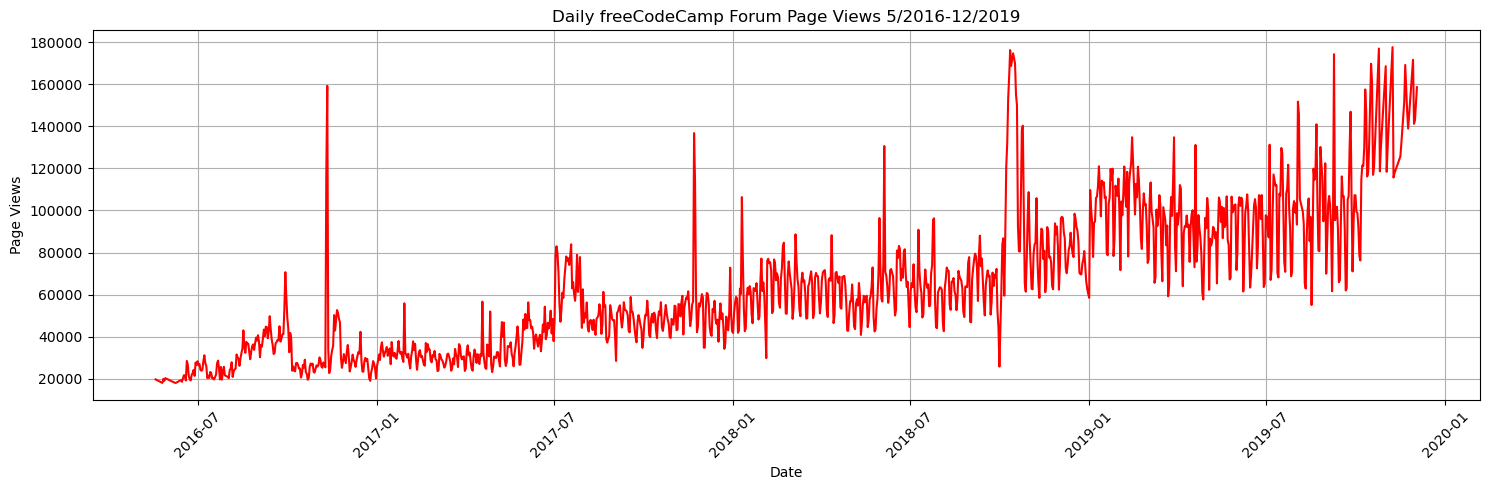

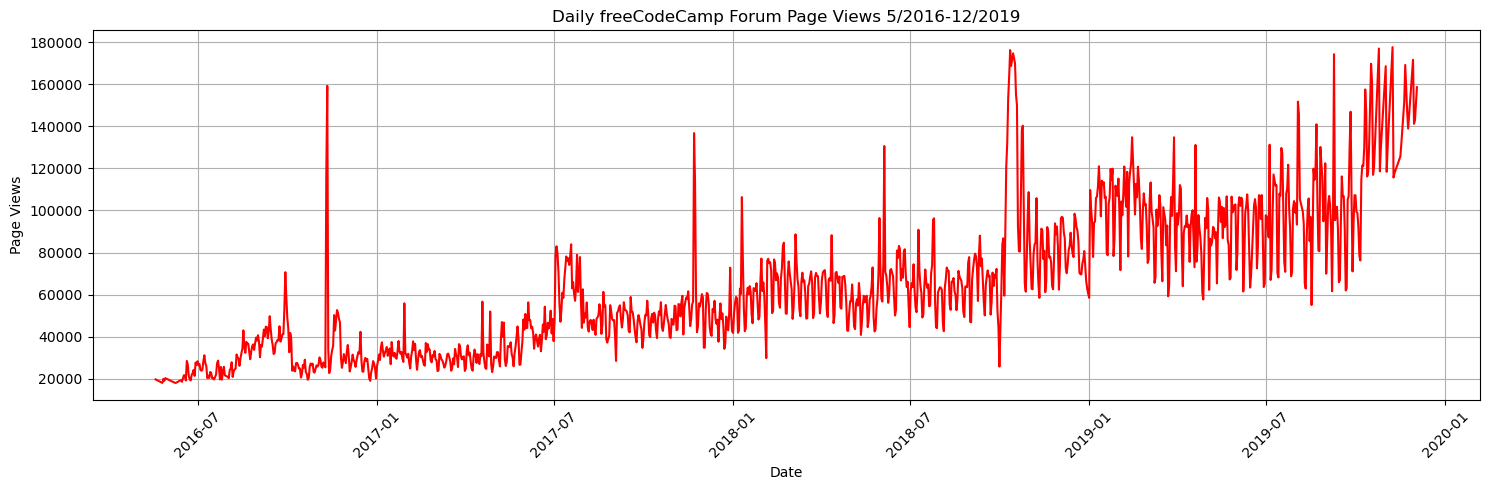

In [26]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

# Call the function to draw the line plot
draw_line_plot()

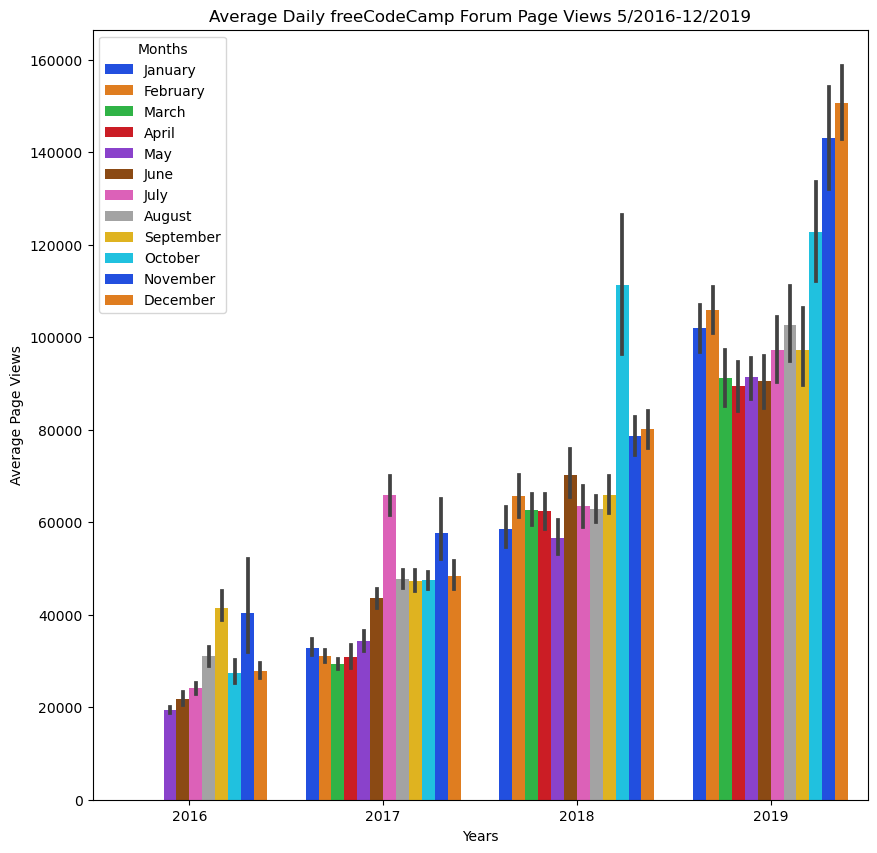

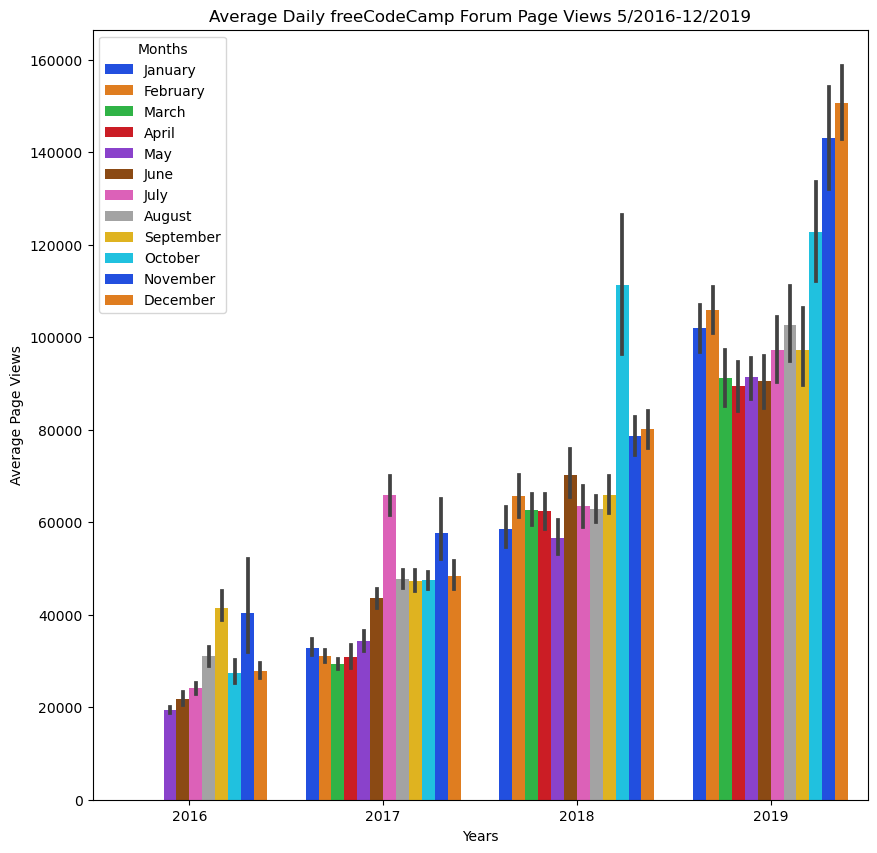

In [27]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar['year'] = [d.year for d in df_bar.date]
    df_bar['month'] = [d.month for d in df_bar.date]

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.barplot(x='year', y='value', data=df_bar, hue='month', palette='bright', ax=ax)
    # set legend labels
    labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
    for t, l in zip(ax.legend(loc='upper left', title='Months').texts, labels): t.set_text(l)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_title('Average Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

# Call the function to draw the bar plot
draw_bar_plot()

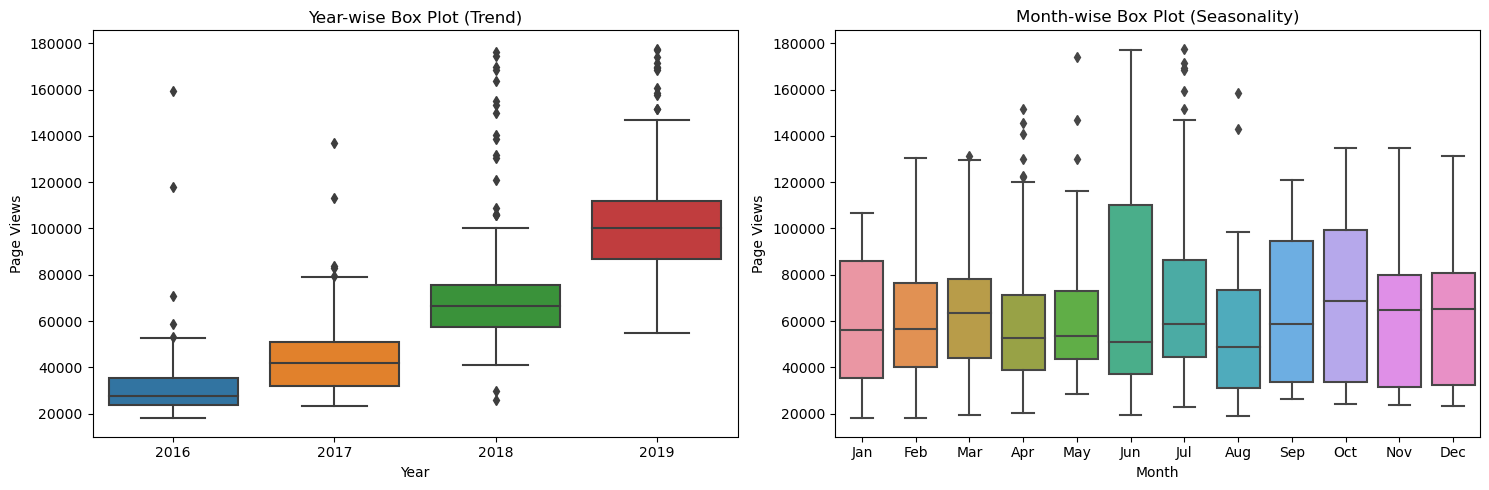

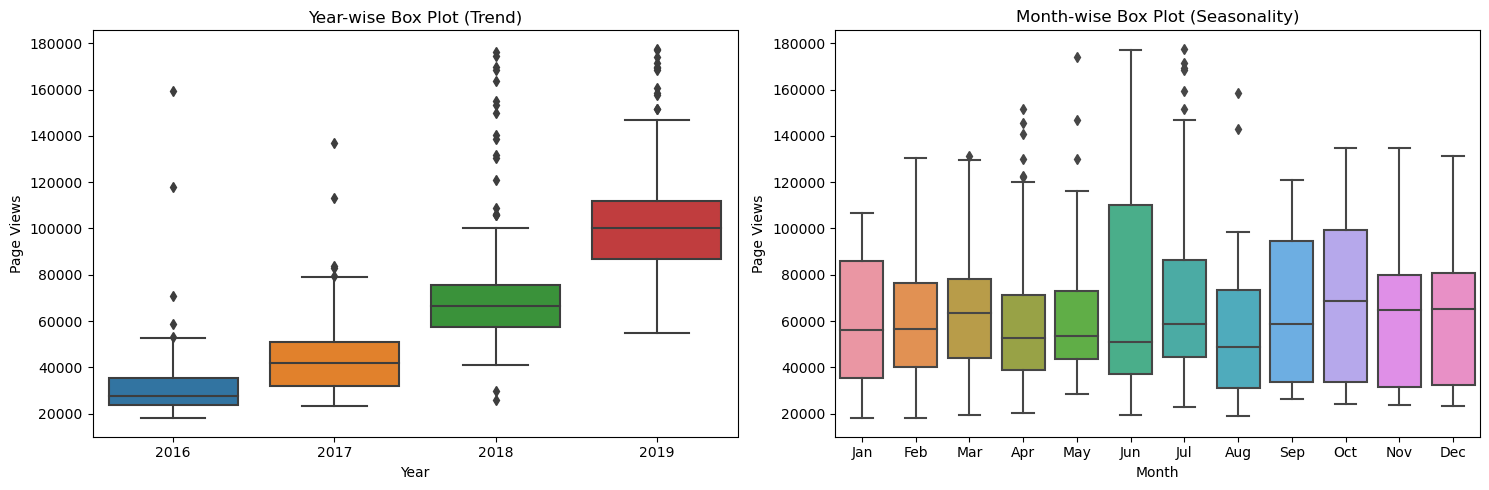

In [28]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    # figure one of year trend
    ax1 = ax[0]
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.set_title('Year-wise Box Plot (Trend)')

    # figure two of month trend
    ax2 = ax[1]
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    # set month order
    ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

# Call the function to draw the box plot
draw_box_plot()